In [1]:
%load_ext autoreload
%autoreload 2
notebook_fixed_dir = False

In [2]:
# this cell can only be called once
import os
if not notebook_fixed_dir:
    os.chdir('..')
    notebook_fixed_dir = True
print(os.getcwd())

/home/svcl-oowl/brandon/research/sil_consistent_at_inference


In [3]:
import pprint

import torch
import pickle
from PIL import Image
import numpy as np
from pytorch3d.renderer import (
    look_at_view_transform
)
import matplotlib.pyplot as plt
import glob

from pose_est import brute_force_pose_est
import postprocess_dataset
from utils import utils

In [4]:
# displays meshes at the predicted pose
def show_meshes(input_dir_img, input_dir_mesh, meshes_group_name="", use_meshes=None):
    pred_poses_path = os.path.join(input_dir_mesh, "pred_poses.p")
    cached_pred_poses = pickle.load(open(pred_poses_path, "rb"))

    for instance_name in cached_pred_poses:
        if use_meshes is None or instance_name in use_meshes:
            input_image = Image.open(os.path.join(input_dir_img, instance_name+".png"))
            with torch.no_grad():
                mesh_original = utils.load_untextured_mesh(os.path.join(input_dir_mesh, instance_name+".obj"), device)
                mesh_processed = utils.load_untextured_mesh(os.path.join(input_dir_mesh, instance_name+"_{}.obj".format(meshes_group_name)), device)

            # rendering original and processed mesh at predicted pose
            pred_dist = cached_pred_poses[instance_name]['dist']
            pred_elev = cached_pred_poses[instance_name]['elev']
            pred_azim = cached_pred_poses[instance_name]['azim']
            R, T = look_at_view_transform(pred_dist, pred_elev, pred_azim)
            mesh_original_render = utils.render_mesh(mesh_original, R, T, device)
            mesh_processed_render = utils.render_mesh(mesh_processed, R, T, device)

            # visualizing
            print(instance_name)
            fig, ax = plt.subplots(nrows=1, ncols=3, squeeze=False)
            ax[0][0].imshow(input_image)
            ax[0][0].xaxis.set_visible(False)
            ax[0][0].yaxis.set_visible(False)

            ax[0][1].imshow(mesh_original_render[0, ..., :3].cpu().numpy())
            ax[0][1].xaxis.set_visible(False)
            ax[0][1].yaxis.set_visible(False)

            ax[0][2].imshow(mesh_processed_render[0, ..., :3].cpu().numpy())
            ax[0][2].xaxis.set_visible(False)
            ax[0][2].yaxis.set_visible(False)
            plt.pause(0.05)

In [5]:
input_dir_img = "data/test_dataset/"
input_dir_mesh = "data/test_dataset/"
cfg_path = "configs/default.yaml"
gpu_num = 0
device = torch.device("cuda:"+str(gpu_num))
experiment_name = "test"
use_meshes = None
#use_meshes = ['3704']

In [8]:
postprocess_dataset.predict_pose("data/img_pix3d_chair/chair/", "data/onet_chair_pix3d_dann_simplified/", gpu_num)


0 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/2394.obj', 'img_path': 'data/img_pix3d_chair/chair/2394.png'}
1 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3729.obj', 'img_path': 'data/img_pix3d_chair/chair/3729.png'}
2 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/1517.obj', 'img_path': 'data/img_pix3d_chair/chair/1517.png'}
3 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3018.obj', 'img_path': 'data/img_pix3d_chair/chair/3018.png'}
4 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0191.obj', 'img_path': 'data/img_pix3d_chair/chair/0191.png'}
5 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0225.obj', 'img_path': 'data/img_pix3d_chair/chair/0225.png'}
6 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0103.obj', 'img_path': 'data/img_pix3d_chair/chair/0103.png'}
7 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/1855.obj', 'img_path': 'data/img_pix3d_chair/chair/1855.png'}
8 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3817.obj'

1069 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/1187.obj', 'img_path': 'data/img_pix3d_chair/chair/1187.png'}
1070 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/2974.obj', 'img_path': 'data/img_pix3d_chair/chair/2974.png'}
1071 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/1178.obj', 'img_path': 'data/img_pix3d_chair/chair/1178.png'}
1072 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3724.obj', 'img_path': 'data/img_pix3d_chair/chair/3724.png'}
1073 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0494.obj', 'img_path': 'data/img_pix3d_chair/chair/0494.png'}
1074 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0550.obj', 'img_path': 'data/img_pix3d_chair/chair/0550.png'}
1075 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/2057.obj', 'img_path': 'data/img_pix3d_chair/chair/2057.png'}
1076 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/1307.obj', 'img_path': 'data/img_pix3d_chair/chair/1307.png'}
1077 {'mesh_path': 'data/onet_chair_pix3

2244 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0515.obj', 'img_path': 'data/img_pix3d_chair/chair/0515.png'}
2245 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3094.obj', 'img_path': 'data/img_pix3d_chair/chair/3094.png'}
2246 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/1201.obj', 'img_path': 'data/img_pix3d_chair/chair/1201.png'}
2247 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/2215.obj', 'img_path': 'data/img_pix3d_chair/chair/2215.png'}
2248 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0717.obj', 'img_path': 'data/img_pix3d_chair/chair/0717.png'}
2249 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0427.obj', 'img_path': 'data/img_pix3d_chair/chair/0427.png'}
2250 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3143.obj', 'img_path': 'data/img_pix3d_chair/chair/3143.png'}
2251 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0155.obj', 'img_path': 'data/img_pix3d_chair/chair/0155.png'}
2252 {'mesh_path': 'data/onet_chair_pix3

3631 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/0726.obj', 'img_path': 'data/img_pix3d_chair/chair/0726.png'}
3632 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/1504.obj', 'img_path': 'data/img_pix3d_chair/chair/1504.png'}
3633 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3772.obj', 'img_path': 'data/img_pix3d_chair/chair/3772.png'}
3634 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3573.obj', 'img_path': 'data/img_pix3d_chair/chair/3573.png'}
3635 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/2011.obj', 'img_path': 'data/img_pix3d_chair/chair/2011.png'}
3636 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/3349.obj', 'img_path': 'data/img_pix3d_chair/chair/3349.png'}
3637 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/2351.obj', 'img_path': 'data/img_pix3d_chair/chair/2351.png'}
3638 {'mesh_path': 'data/onet_chair_pix3d_dann_simplified/1842.obj', 'img_path': 'data/img_pix3d_chair/chair/1842.png'}
3639 {'mesh_path': 'data/onet_chair_pix3

RuntimeError: No active exception to reraise

In [ ]:
# python batched_postprocess_dataset.py  data/test_dataset data/test_dataset configs/default.yaml 1 3 

In [14]:
dataset_loss_info = postprocess_dataset.postprocess_data(input_dir_img, input_dir_mesh, cfg_path, gpu_num, meshes_group_name=experiment_name,
                                                         recompute_poses=False, meshes_to_render=use_meshes)

/home/svcl-oowl/brandon/research/sil_consistent_at_inference/utils/utils.py:51: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg_special = yaml.load(f)


{'model': {'latent_dim_pointnet': 512, 'latent_dim_resnet': 256},
 'semantic_dis_training': {'epochs': 20,
                           'eval_every': 5,
                           'fake_dataset_dir': 'data/semantic_dis/fake_renders',
                           'real_dataset_dir': 'data/semantic_dis/real_renders',
                           'weight_path': 'deformation/semantic_dis_net_weights.pt'},
 'training': {'img_sym_lam': 100,
              'img_sym_num_azim': 1,
              'l2_lam': 1,
              'lap_lam': 10,
              'learning_rate': 1e-05,
              'normals_lam': 10,
              'num_iterations': 600,
              'semantic_dis_lam': 0,
              'semantic_dis_num_render': 3,
              'sil_lam': 20,
              'vertex_sym_lam': 0.1}}


KeyboardInterrupt: 

3704


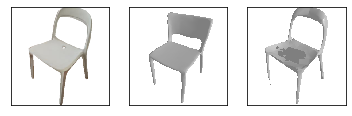

In [17]:
# show postprocessed meshes at predicted angle
show_meshes(input_dir_img, input_dir_mesh, experiment_name, use_meshes)

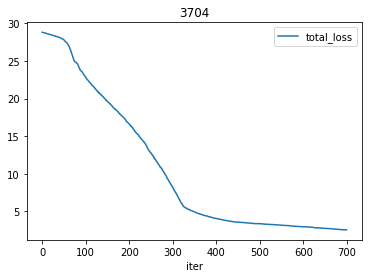

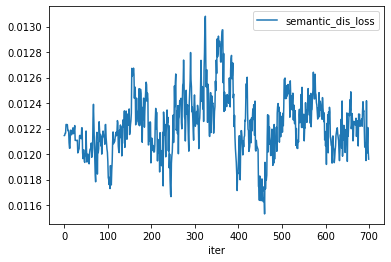

In [15]:
# show training loss info
for instance_name in dataset_loss_info:
    loss_info = dataset_loss_info[instance_name]
    loss_info.plot.line(x='iter', y='total_loss', title="{}".format(instance_name))
    #loss_info.plot.line(x='iter', y='sil_loss')
    #loss_info.plot.line(x='iter', y='img_sym_loss')
    #loss_info.plot.line(x='iter', y='vertex_sym_loss')
    #loss_info.plot.line(x='iter', y='l2_loss')
    #loss_info.plot.line(x='iter', y='lap_smoothness_loss')
    #loss_info.plot.line(x='iter', y='normal_consistency_loss')
    loss_info.plot.line(x='iter', y='semantic_dis_loss')

In [ ]:
# delete all postprocessed meshes, reverting back to only original objs and imgs
all_mesh_paths = glob.glob(os.path.join(input_dir_mesh, "*.obj"))
for mesh_path in all_mesh_paths:
    if '_' in mesh_path.split('/')[-1]:
        os.remove(mesh_path)